In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df=pd.read_csv("C:\\Users\\ADMIN\\MLprojects\\used_vehicle.csv")

In [3]:
df.head()

,Unnamed: 0,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989


# Data Preprocessing Part1

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(24198, 16)

In [5]:
df.dtypes

Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                object
 Highway             object
Price                 int64
dtype: object

In [6]:
# remove rows with missing values in 'City' and 'Highway' columns in the original dataframe 
df.dropna(subset=[' City',' Highway'],inplace=True)
# Extract all the Characters before the first 'L' only if 'L' is present 
mask = df[' City'].str.contains('L')
df.loc[mask, ' City'] = df.loc[mask, ' City'].str.split('L', n=1, expand=True)[0]

mask = df[' Highway'].str.contains('L')
df.loc[mask, ' Highway'] = df.loc[mask, ' Highway'].str.split('L', n=1, expand=True)[0]

df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [7]:
#Remove non-numeric charecters from the 'City' and 'Highway' columns
df[' City'] = df[' City'].str.replace('[^0-9]', '').astype(int)
df[' Highway'] = df[' Highway'].str.replace('[^0-9]', '').astype(int)

print(df.dtypes)

Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                 int32
 Highway              int32
Price                 int64
dtype: object


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21812\2908450199.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[' City'] = df[' City'].str.replace('[^0-9]', '').astype(int)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21812\2908450199.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[' Highway'] = df[' Highway'].str.replace('[^0-9]', '').astype(int)


In [8]:
df.shape

(17835, 16)

In [9]:
df.dropna(subset=['Kilometres'], inplace=True)
df['Kilometres'] = df['Kilometres'].str.replace('km', '').astype(int)
df.dtypes

Year                  int64
Make                 object
Model                object
Kilometres            int32
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                 int32
 Highway              int32
Price                 int64
dtype: object

In [10]:
df.shape

(17662, 16)

In [11]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,122,90,43880
1,2018,Acura,MDX,77127,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,126,90,36486
2,2019,Acura,RDX,33032,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,110,86,40888
3,2020,Acura,RDX,50702,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,110,86,44599
4,2021,Acura,RDX,67950,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,113,91,46989


In [12]:
#Add decimal point to Highway and City columns 
df[' Highway'] = df[' Highway'] / 10
df[' City'] = df[' City'] / 10
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [13]:
#Iterate over columns with object datatype 
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 39
The number of unique values in the "Model" column is: 489
The number of unique values in the "Body Type" column is: 26
The number of unique values in the " Engine" column is: 957
The number of unique values in the " Transmission" column is: 20
The number of unique values in the " Drivetrain" column is: 6
The number of unique values in the " Exterior Colour" column is: 1258
The number of unique values in the " Interior Colour" column is: 15
The number of unique values in the " Doors" column is: 4
The number of unique values in the " Fuel Type" column is: 11


In [14]:
def fetch_model(text):
    if 'MDX' in text:
        return 'MDX'
    elif 'TSX' in text:
        return 'TSX'
    elif 'TSX' in text:
        return 'TSX'
    elif 'Grand' in text:
        return 'Grand'
    elif 'Civic' in text:
        return 'Civic'
    elif 'RDX' in text:
        return 'RDX'
    elif 'ILX' in text:
        return 'ILX'
    elif 'TLX' in text:
        return 'TLX'
    else:
        return 'Other Model'

In [15]:
df['Model'] = df['Model'].apply(fetch_model)

<AxesSubplot:>

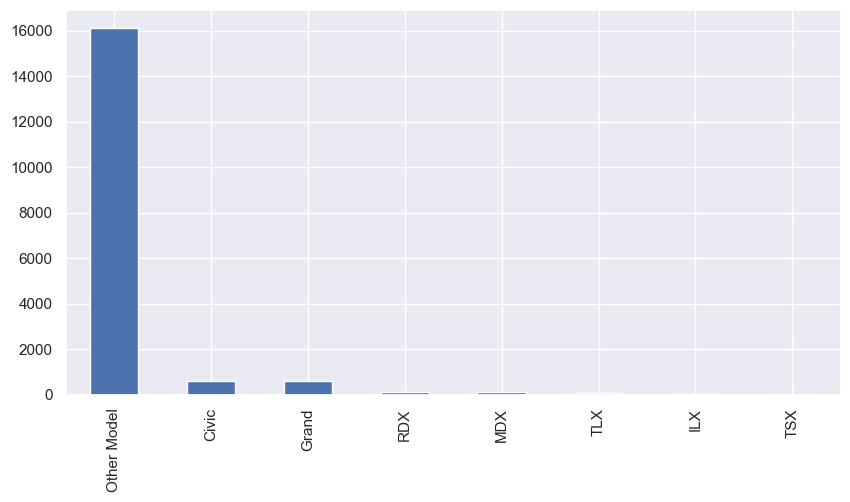

In [16]:
plt.figure(figsize=(10,5))
df['Model'].value_counts().plot(kind='bar')

In [17]:
df.drop(columns=[' Exterior Colour', ' Interior Colour'], inplace=True)
df.shape

(17662, 14)

In [18]:
df.Make.unique()

array(['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'Volvo', 'BMW',
       'Aston Martin', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Maserati', 'Porsche', 'Mazda', 'McLaren', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Scion', 'Subaru', 'Dodge', 'Ferrari', 'Fiat',
       'Ford', 'Genesis', 'GMC', 'Honda', 'Hummer', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Nissan', 'Polestar',
       'Rolls-Royce', 'Suzuki', 'Volkswagen'], dtype=object)

# make the segmentation for the car brands

In [19]:
def segment_make(make):
    if make in ['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'Cadillac', 'Genesis', 'infiniti', 'Jaguar', 'Lamborgini']:
        return 'Luxury'
    elif make in ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Jeep', 'Ram']:
        return 'Mainstreem'
    elif make in ['Ferrari', 'Lotus']:
        return 'Sports'
    elif make in ['Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Subaru', 'Toyota', 'Volkswagen']:
        return 'Value'
    else:
        return 'Other'

In [20]:
df['Make'] = df['Make'].apply(segment_make)

<AxesSubplot:>

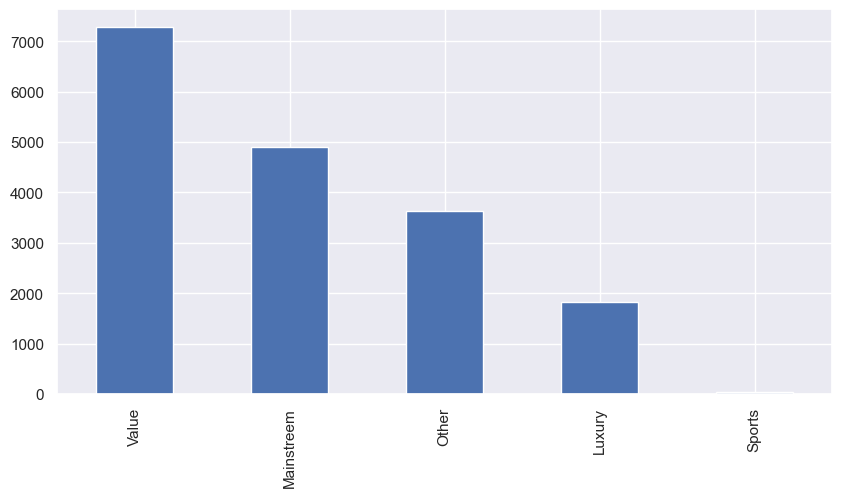

In [21]:
plt.figure(figsize=(10,5))
df['Make'].value_counts().plot(kind='bar')

# Segment Body Type

In [22]:
df['Body Type'].unique()

array(['SUV', 'Sedan', 'Coupe', 'Convertible', 'Hatchback', nan, 'Wagon',
       'Roadster', 'Station Wagon', 'Truck', 'Truck Extended Cab',
       'Extended Cab', 'Crew Cab', 'Regular Cab', 'Compact',
       'Truck Crew Cab', 'Super Cab', 'Minivan', 'Cabriolet',
       'Van Regular', 'Super Crew', 'Quad Cab', 'Truck Super Cab',
       'Van Extended', 'Truck Double Cab', 'Truck King Cab',
       'Truck Long Crew Cab'], dtype=object)

In [23]:
# Define the body type segments
suv = ['SUV']
sedan = ['Sedan', 'Coupe', 'Convertible']
hatchback = ['Hatchback']
wagon = ['Wagon', 'Station Wagon']
truck = ['Truck', 'Truck Extended Cab', 'Extended Cab', 'Crew Cab',
         'Regular Cab', 'Truck Crew Cab', 'Super Cab', 'Quad Cab',
         'Truck Super Cab', 'Truck Double Cab', 'Truck King Cab',
         'Truck Longer Crew Cab']
van = ['Van Regular', 'Van Extended']
minivan = ['Mnivan']
roadster = ['Roadster']
cabriolet = ['Cabriolet']
super_crew = ['Super Crew']
compact = ['Compact']
# Create a dictionary to map each body type to its corresponding segment 
body_type_segments = {}
for body_type in df['Body Type'].unique():
    if body_type in suv:
        body_type_segments[body_type] = 'SUV'
    elif body_type in sedan:
        body_type_segments[body_type] = 'Sedan'
    elif body_type in hatchback:
        body_type_segments[body_type] = 'Hatchback'
    elif body_type in wagon:
        body_type_segments[body_type] = 'Wagon'
    elif body_type in truck:
        body_type_segments[body_type] = 'Truck'
    elif body_type in van:
        body_type_segments[body_type] = 'Van'
    elif body_type in minivan:
        body_type_segments[body_type] = 'Minivan'
    elif body_type in roadster:
        body_type_segments[body_type] = 'Roadster'
    elif body_type in cabriolet:
        body_type_segments[body_type] = 'Cabriolet'
    elif body_type in super_crew:
        body_type_segments[body_type] = 'Super Crew'
    elif body_type in compact:
        body_type_segments[body_type] = 'Compact'
    else:
        body_type_segments[body_type] = 'Other' 

# Map the body type segments to the dataframe
df['Body Type'] = df['Body Type'].map(body_type_segments)

<AxesSubplot:>

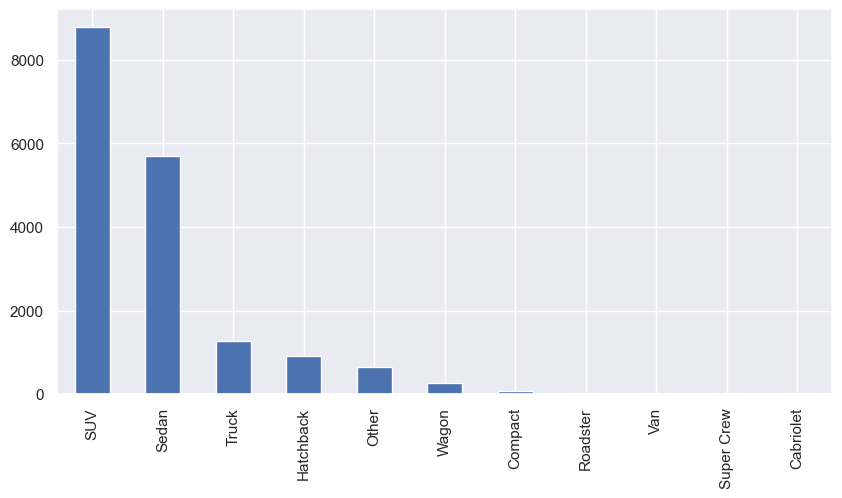

In [24]:
plt.figure(figsize=(10,5))
df['Body Type'].value_counts().plot(kind='bar')

In [25]:
df[' Transmission'].unique()

array(['9 Speed Automatic', '10 Speed Automatic', nan, 'Automatic',
       '6 Speed Manual', '8 Speed Automatic', '6 Speed Automatic',
       '8 Speed Automatic with auto-shift', '5 Speed Automatic',
       '5 Speed Manual', '4 Speed Automatic', 'Manual',
       '7 Speed Automatic with auto-shift',
       '6 Speed Automatic with auto-shift', 'Sequential',
       '7 Speed Automatic', 'CVT', '1 Speed Automatic', '7 Speed Manual',
       '5 Speed Automatic with auto-shift', 'F1 Transmission'],
      dtype=object)

In [26]:
def segment_transmission(transmission):
    if transmission in ['Automatic', 'CVT', '1 Speed Automatic']:
        return 'Automatic'
    elif transmission in ['6 Speed Manual', '5 Speed Manual', '7 Speed Manual']:
        return 'manual'
    elif transmission in ['9 Speed Automatic', '10 Speed Automatic', ' 8 Speed Automatic', '7 Speed Automatic', '5 Speed Automatic']:
        return 'Traditional Automatic'
    elif transmission in ['8 Speed Automatic with auto-shift', '6 Speed Automatic with auto-shift', '7 Speed Automatic with auto-shift']:
        return 'Automated Manual'
    elif transmission == 'Sequential':
        return 'Semi-Automatic'
    elif transmission == 'F1 Transmission': 
        return 'Automated Single-Clutch'
    else:
        return 'Unknown'
    
df['Transmission'] = df[' Transmission'].apply(segment_transmission)

<AxesSubplot:>

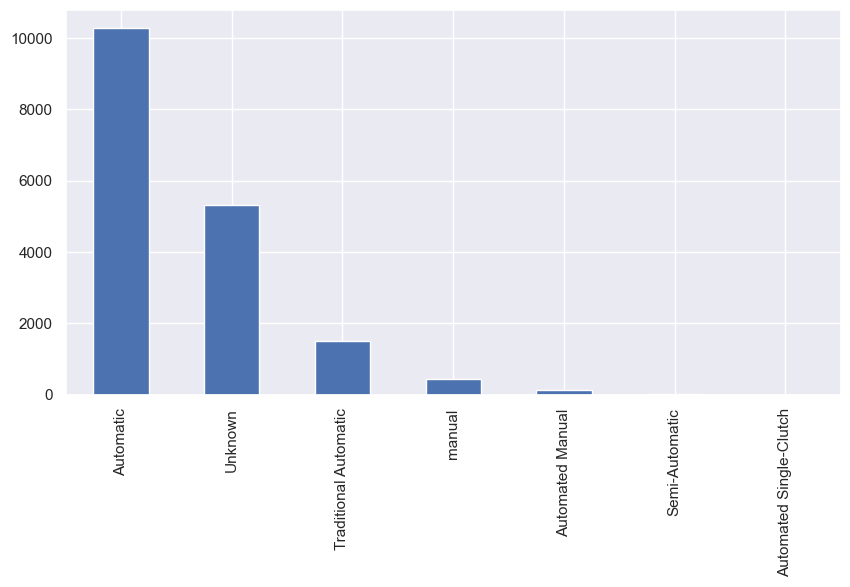

In [27]:
plt.figure(figsize=(10,5))
df['Transmission'].value_counts().plot(kind='bar')

In [28]:
df.drop(columns=[' Transmission'],inplace=True)
df.shape

(17662, 14)

# Drop  Engine Columns

In [29]:
df.drop(columns=[' Engine'],inplace=True)
df.shape

(17662, 13)

In [30]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Drivetrain,Passengers,Doors,Fuel Type,City,Highway,Price,Transmission
0,2019,Luxury,MDX,53052,SUV,AWD,NaN,NaN,Gas,12.2,9.0,43880,Traditional Automatic
1,2018,Luxury,MDX,77127,SUV,AWD,NaN,NaN,Gas,12.6,9.0,36486,Traditional Automatic
2,2019,Luxury,RDX,33032,SUV,AWD,5.0,4,Premium Unleaded,11.0,8.6,40888,Traditional Automatic
3,2020,Luxury,RDX,50702,SUV,AWD,NaN,NaN,Gas,11.0,8.6,44599,Unknown
4,2021,Luxury,RDX,67950,SUV,AWD,NaN,NaN,Gas,11.3,9.1,46989,Unknown


# Exploratory Data Analysis

In [31]:
# iterate over columns with object datatypes
for col in df.select_dtypes(include='object'):
    # count the number of unique values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 5
The number of unique values in the "Model" column is: 8
The number of unique values in the "Body Type" column is: 11
The number of unique values in the " Drivetrain" column is: 6
The number of unique values in the " Doors" column is: 4
The number of unique values in the " Fuel Type" column is: 11
The number of unique values in the "Transmission" column is: 7


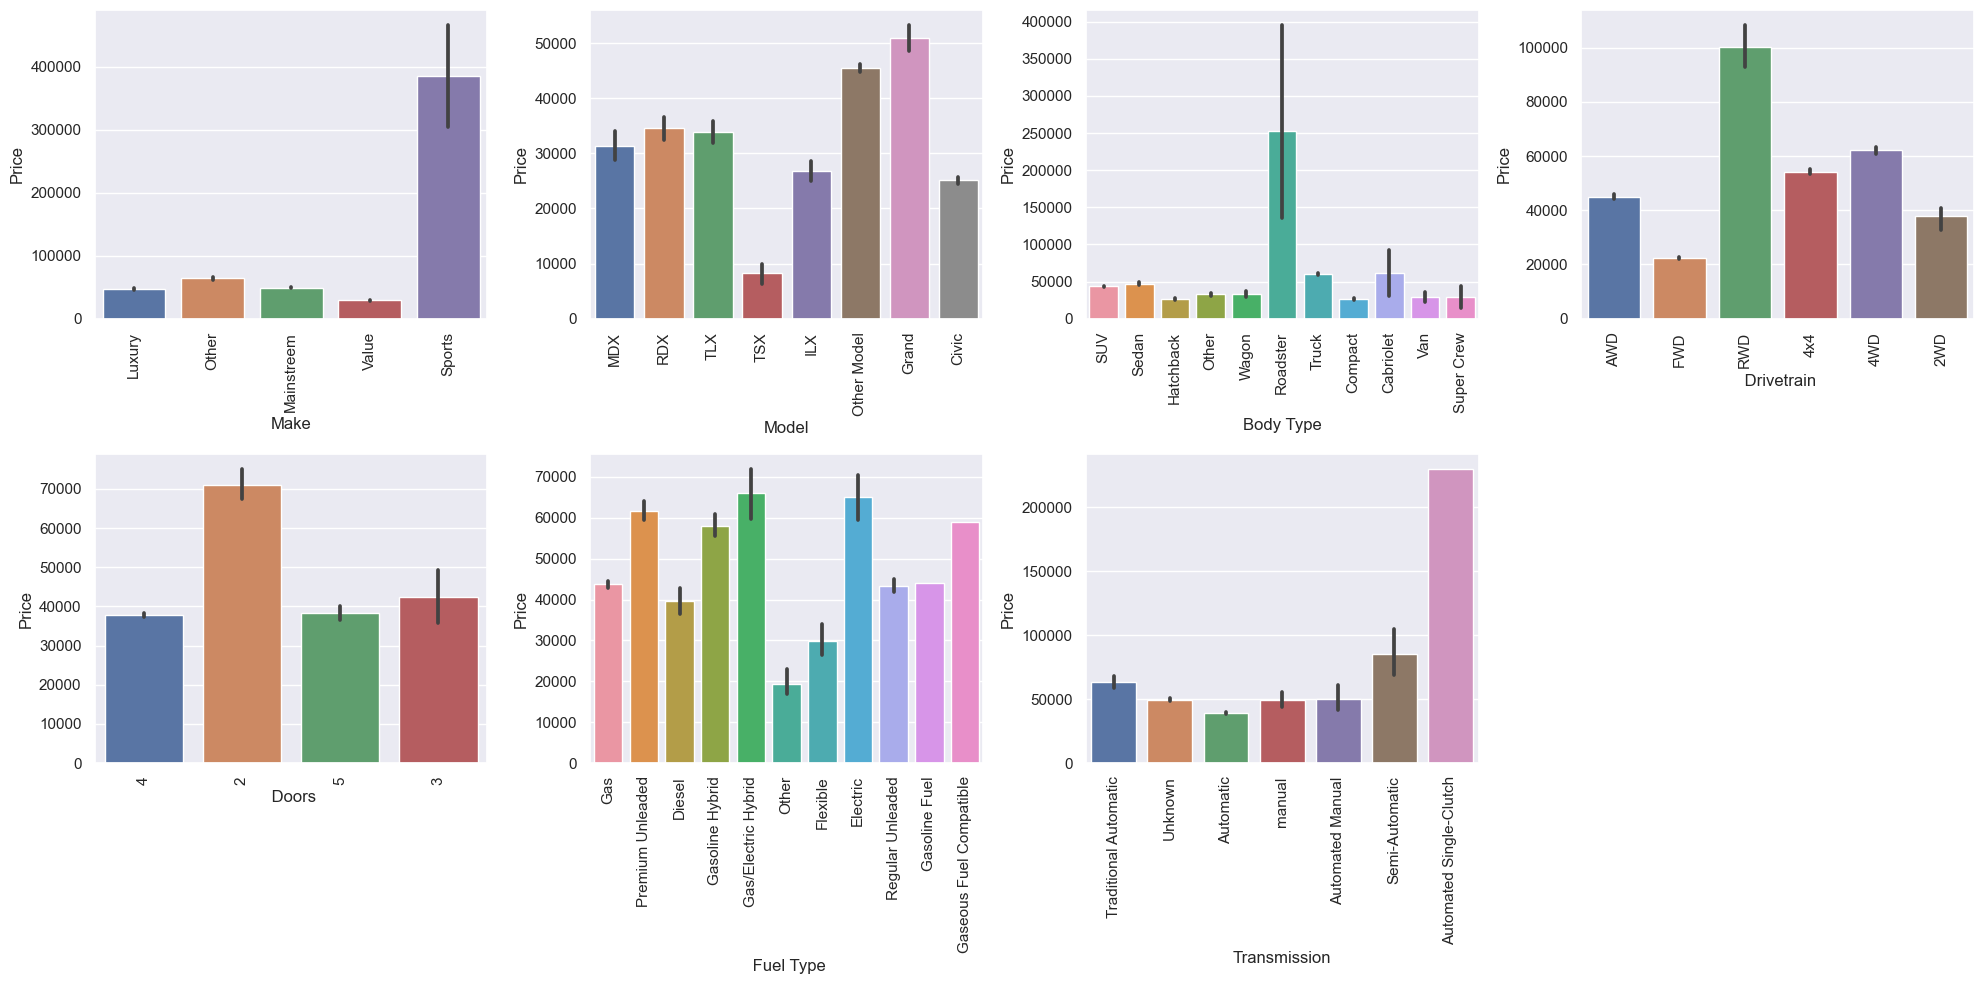

In [32]:
# List of categorical variables to plot 
cat_vars = ['Make', 'Model', 'Body Type', ' Drivetrain', ' Doors', ' Fuel Type', 'Transmission']

# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.ravel()

# Create barplot for each categorical variable 
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
# remove the eighth subplot
fig.delaxes(axs[7])

# Adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

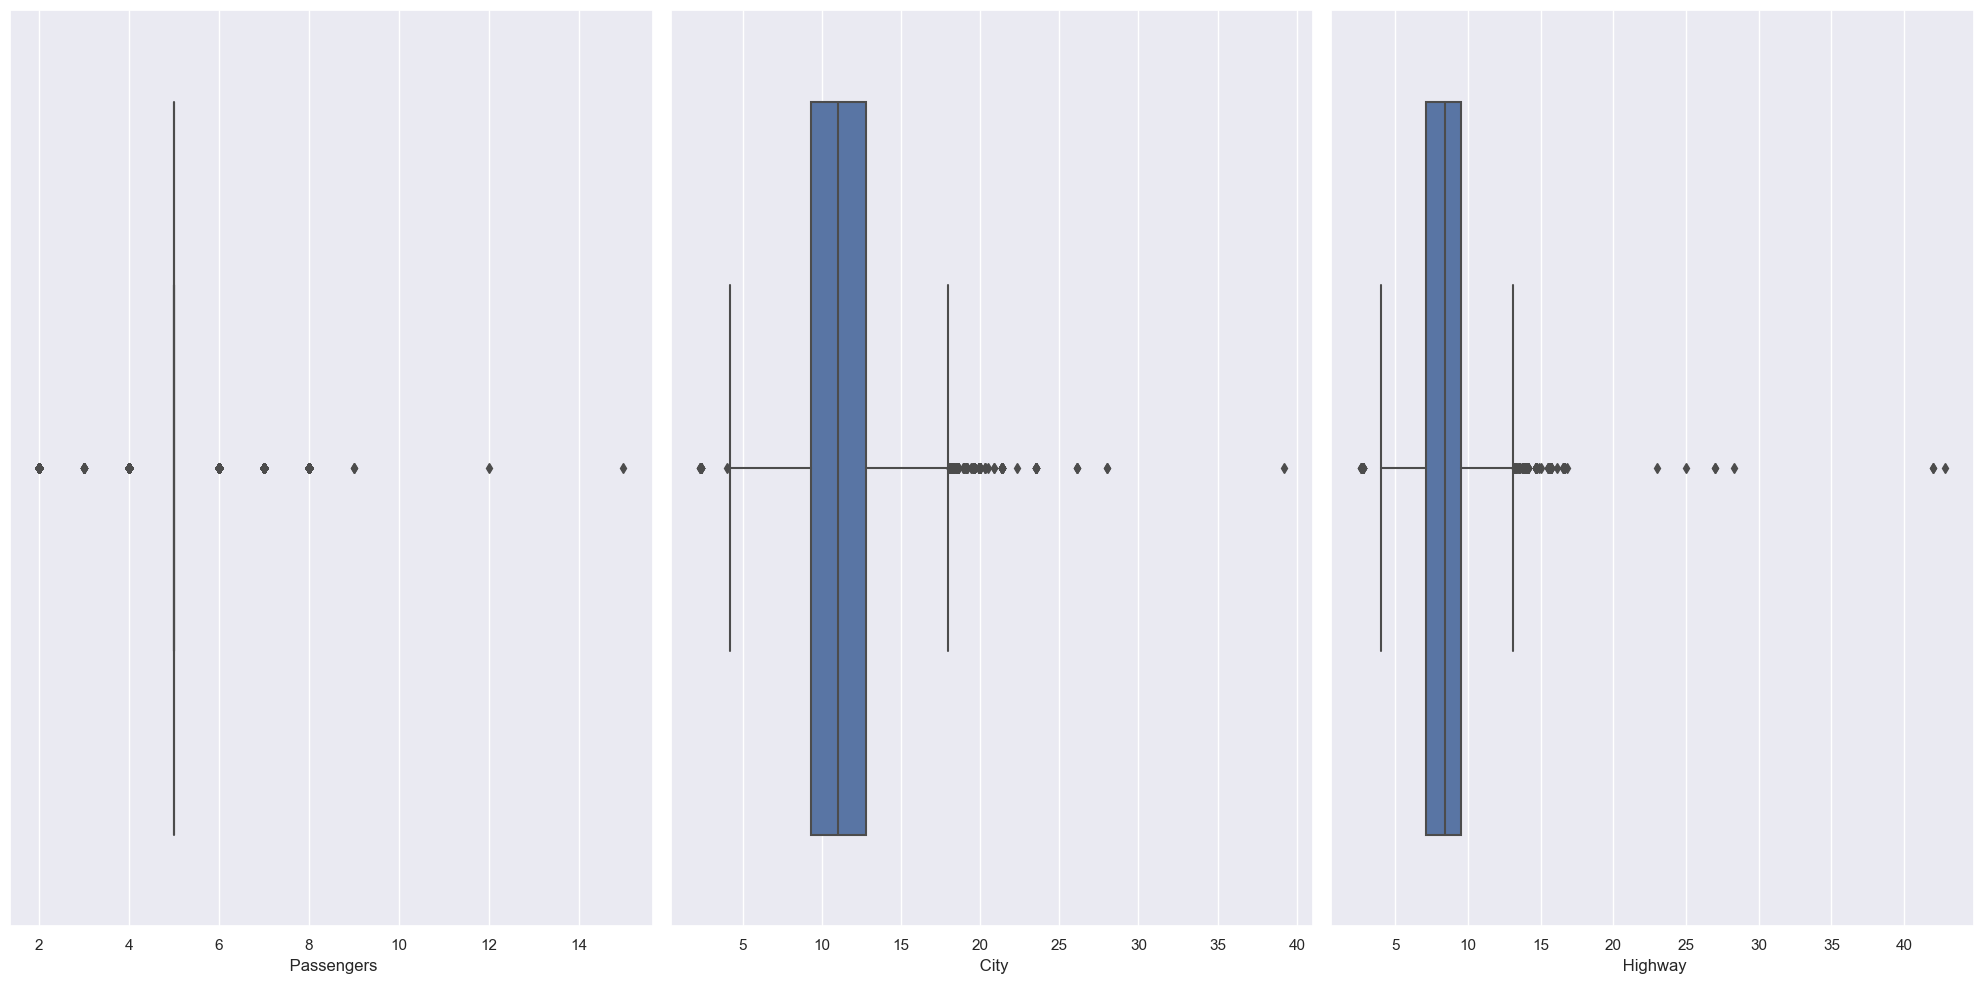

In [33]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

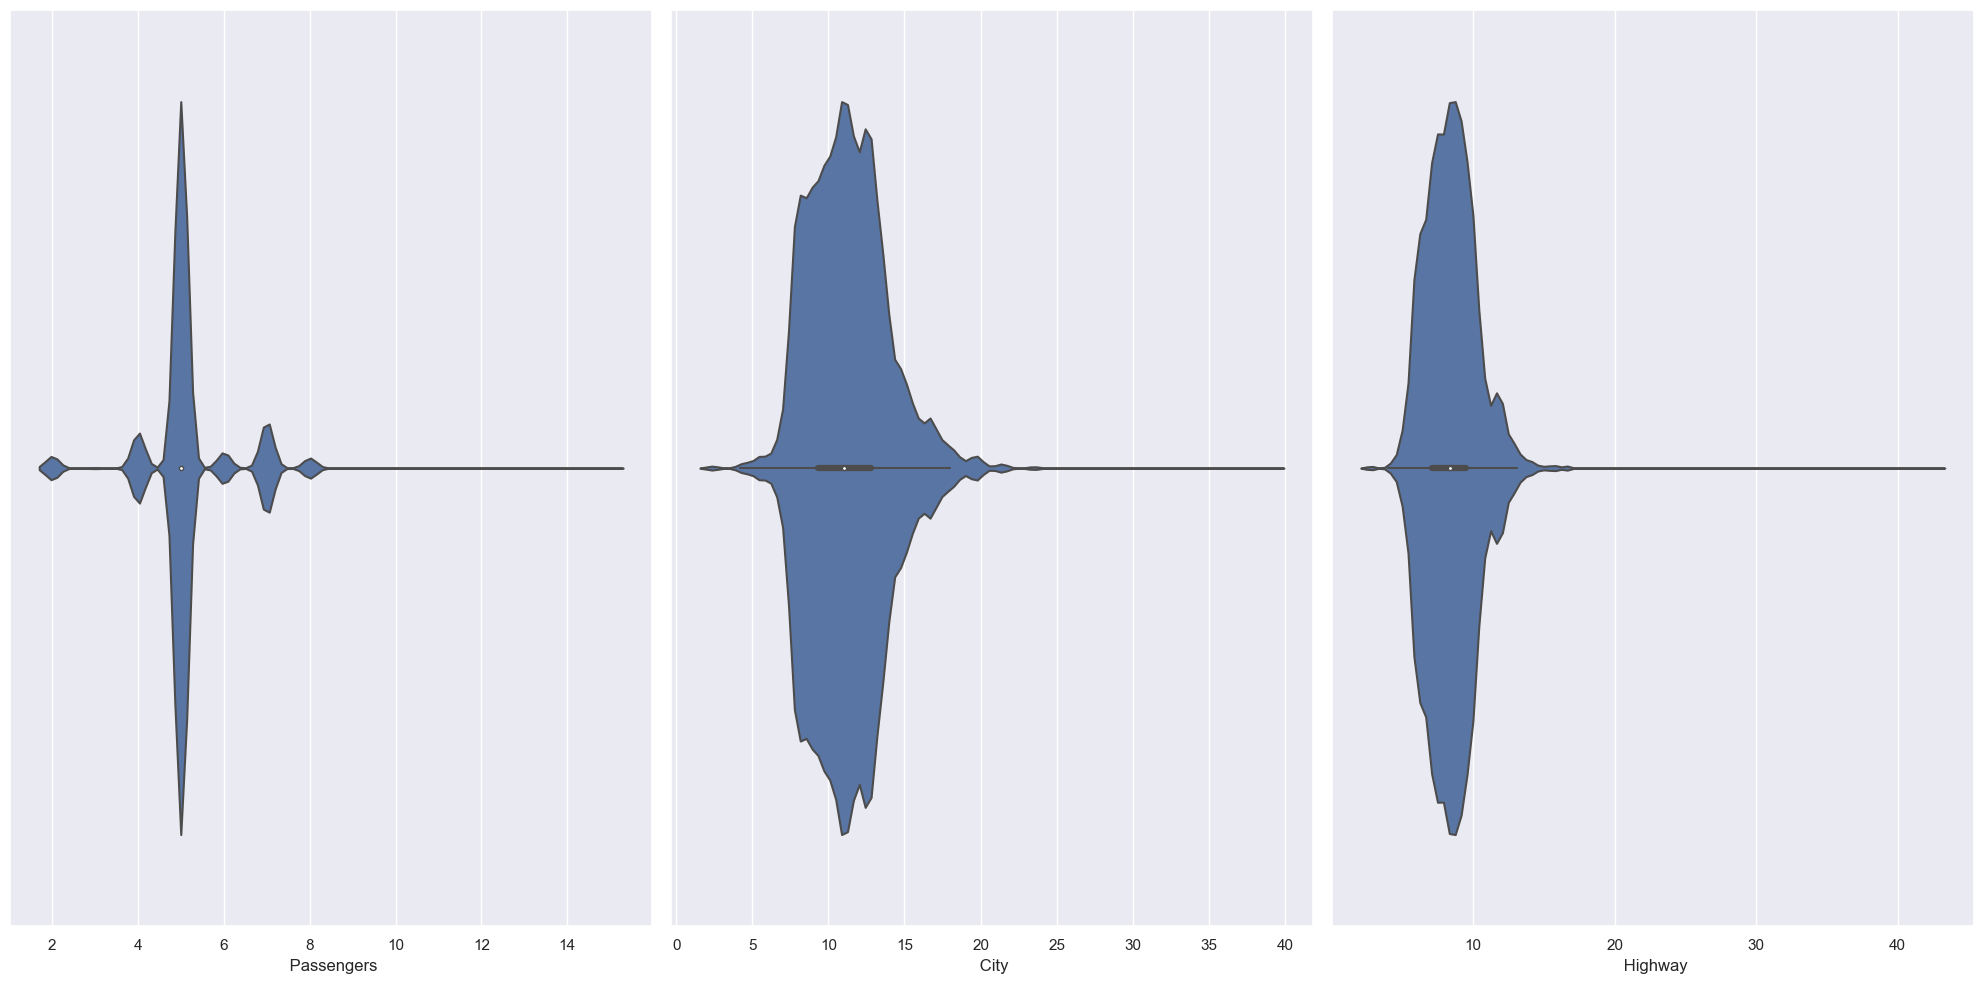

In [34]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

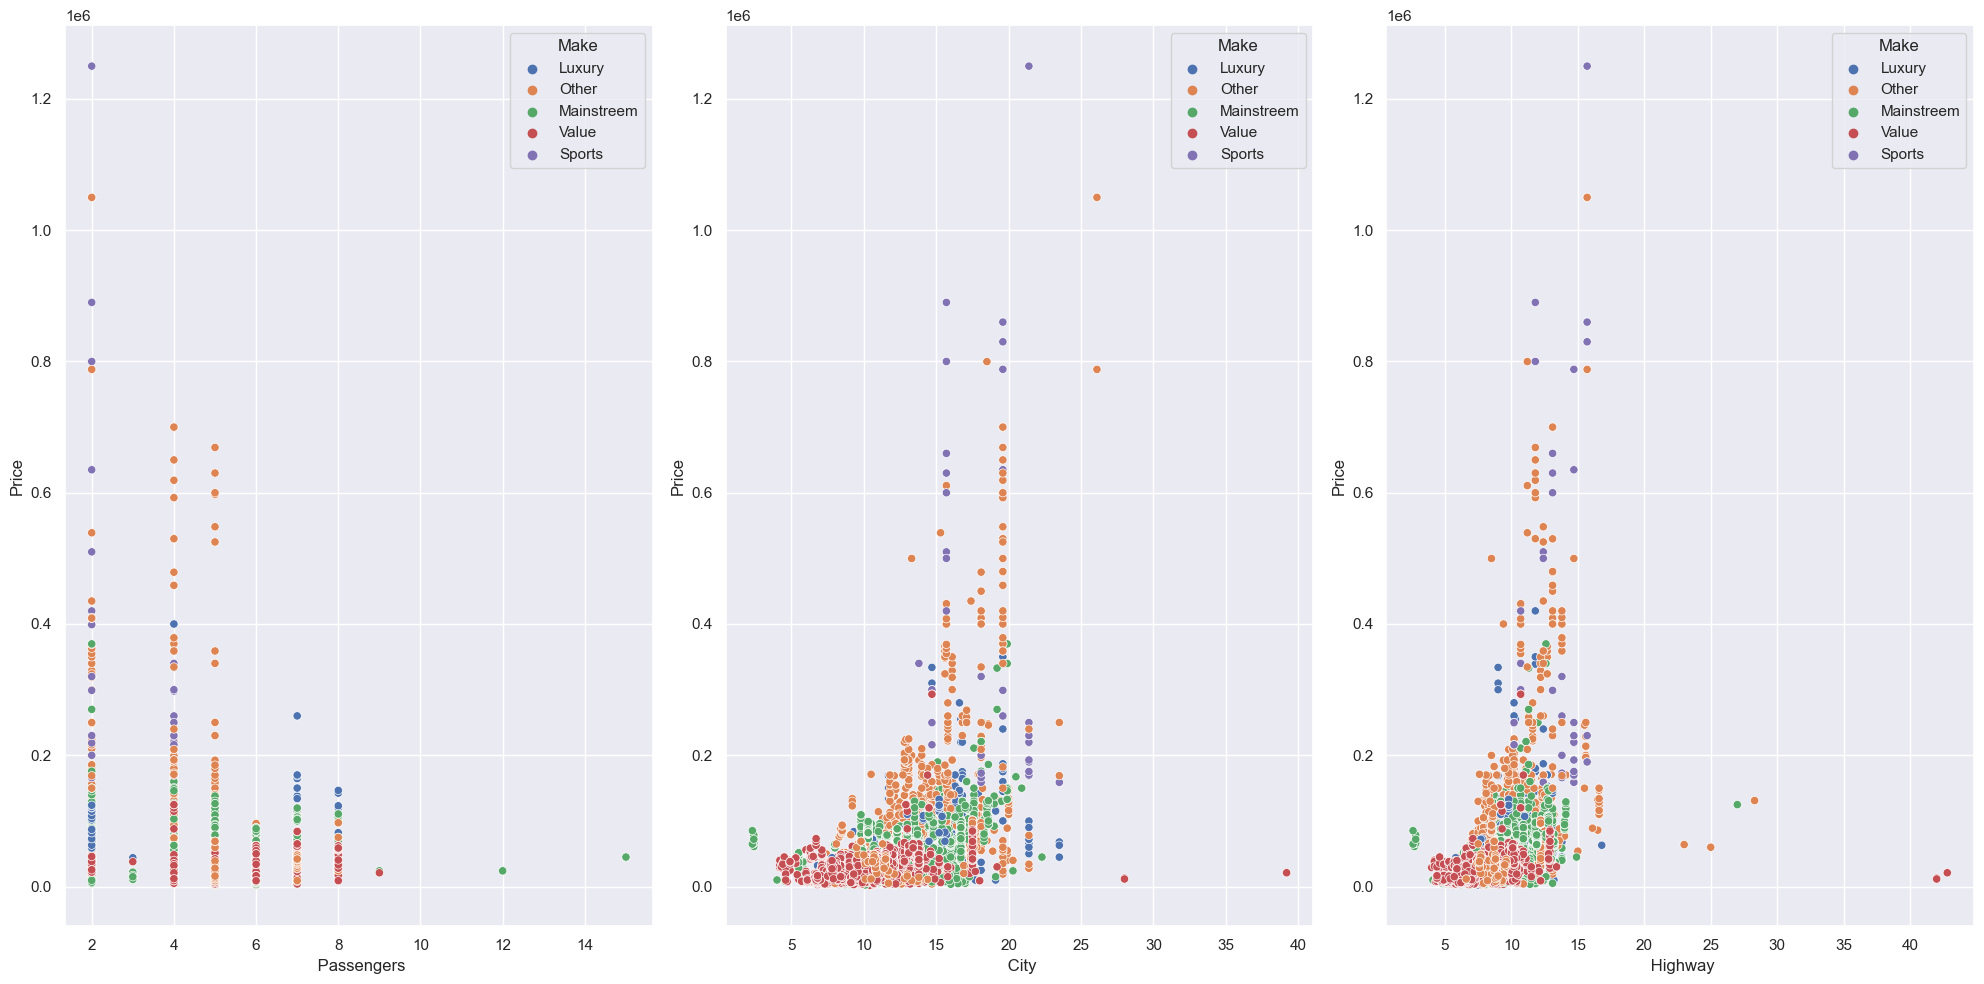

In [35]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Make', data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

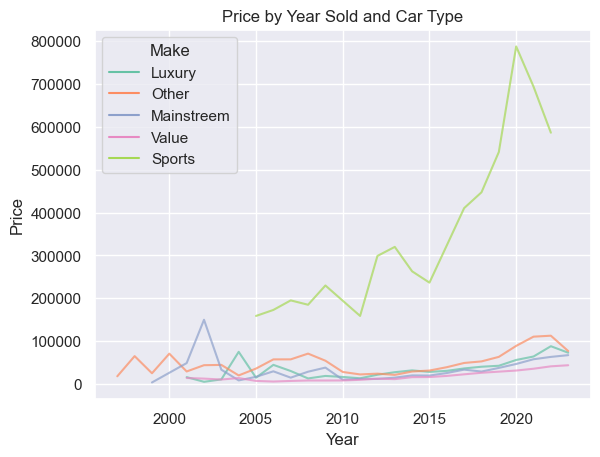

In [36]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price', hue='Make', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

# Data Preprocessing Part2

In [37]:
check_missing = df.isnull().sum() *100 /df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

 Passengers    46.342430
 Doors         19.805232
 Drivetrain     2.276073
dtype: float64

In [38]:
df.drop(columns=[' Passengers'], inplace=True)
df[' Doors'] = df[' Doors'].fillna(df[' Doors'].median())
df.dropna(subset=[' Drivetrain'], inplace=True)
df.shape

(17260, 12)

# Label Encoding for Object datatype

In [39]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print yhe column name and the unique values
    print(f"{col}: {df[col].unique()}")      

Make: ['Luxury' 'Other' 'Mainstreem' 'Value' 'Sports']
Model: ['MDX' 'RDX' 'TLX' 'TSX' 'ILX' 'Other Model' 'Grand' 'Civic']
Body Type: ['SUV' 'Sedan' 'Hatchback' 'Other' 'Wagon' 'Roadster' 'Truck' 'Compact'
 'Cabriolet' 'Van' 'Super Crew']
 Drivetrain: ['AWD' 'FWD' 'RWD' '4x4' '4WD' '2WD']
 Doors: [4.0 '4' '2' '5' '3']
 Fuel Type: ['Gas' 'Premium Unleaded' 'Diesel' 'Gasoline Hybrid' 'Gas/Electric Hybrid'
 'Other' 'Flexible' 'Electric' 'Regular Unleaded' 'Gasoline Fuel'
 'Gaseous Fuel Compatible']
Transmission: ['Traditional Automatic' 'Unknown' 'Automatic' 'manual' 'Automated Manual'
 'Semi-Automatic' 'Automated Single-Clutch']


In [40]:
df[' Doors'] = df[' Doors'].astype(float)

In [41]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Make: [0 2 1 4 3]
Model: [3 5 6 7 2 4 1 0]
Body Type: [ 5  6  2  3 10  4  8  1  0  9  7]
 Drivetrain: [3 4 5 2 1 0]
 Fuel Type: [ 3  9  0  7  4  8  2  1 10  6  5]
Transmission: [4 5 2 6 0 3 1]


In [42]:
df.dtypes

Year              int64
Make              int32
Model             int32
Kilometres        int32
Body Type         int32
 Drivetrain       int32
 Doors          float64
 Fuel Type        int32
 City           float64
 Highway        float64
Price             int64
Transmission      int32
dtype: object

# Remove Outlier using Z-Score

In [43]:
from scipy import stats

# define  a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # Loop over each selected column
    for col in cols:
        # Calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # Remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [44]:
selected_cols = [' City', ' Highway']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(17027, 12)

In [45]:
#datframe before the ourtlier removed
df.shape

(17260, 12)

<AxesSubplot:>

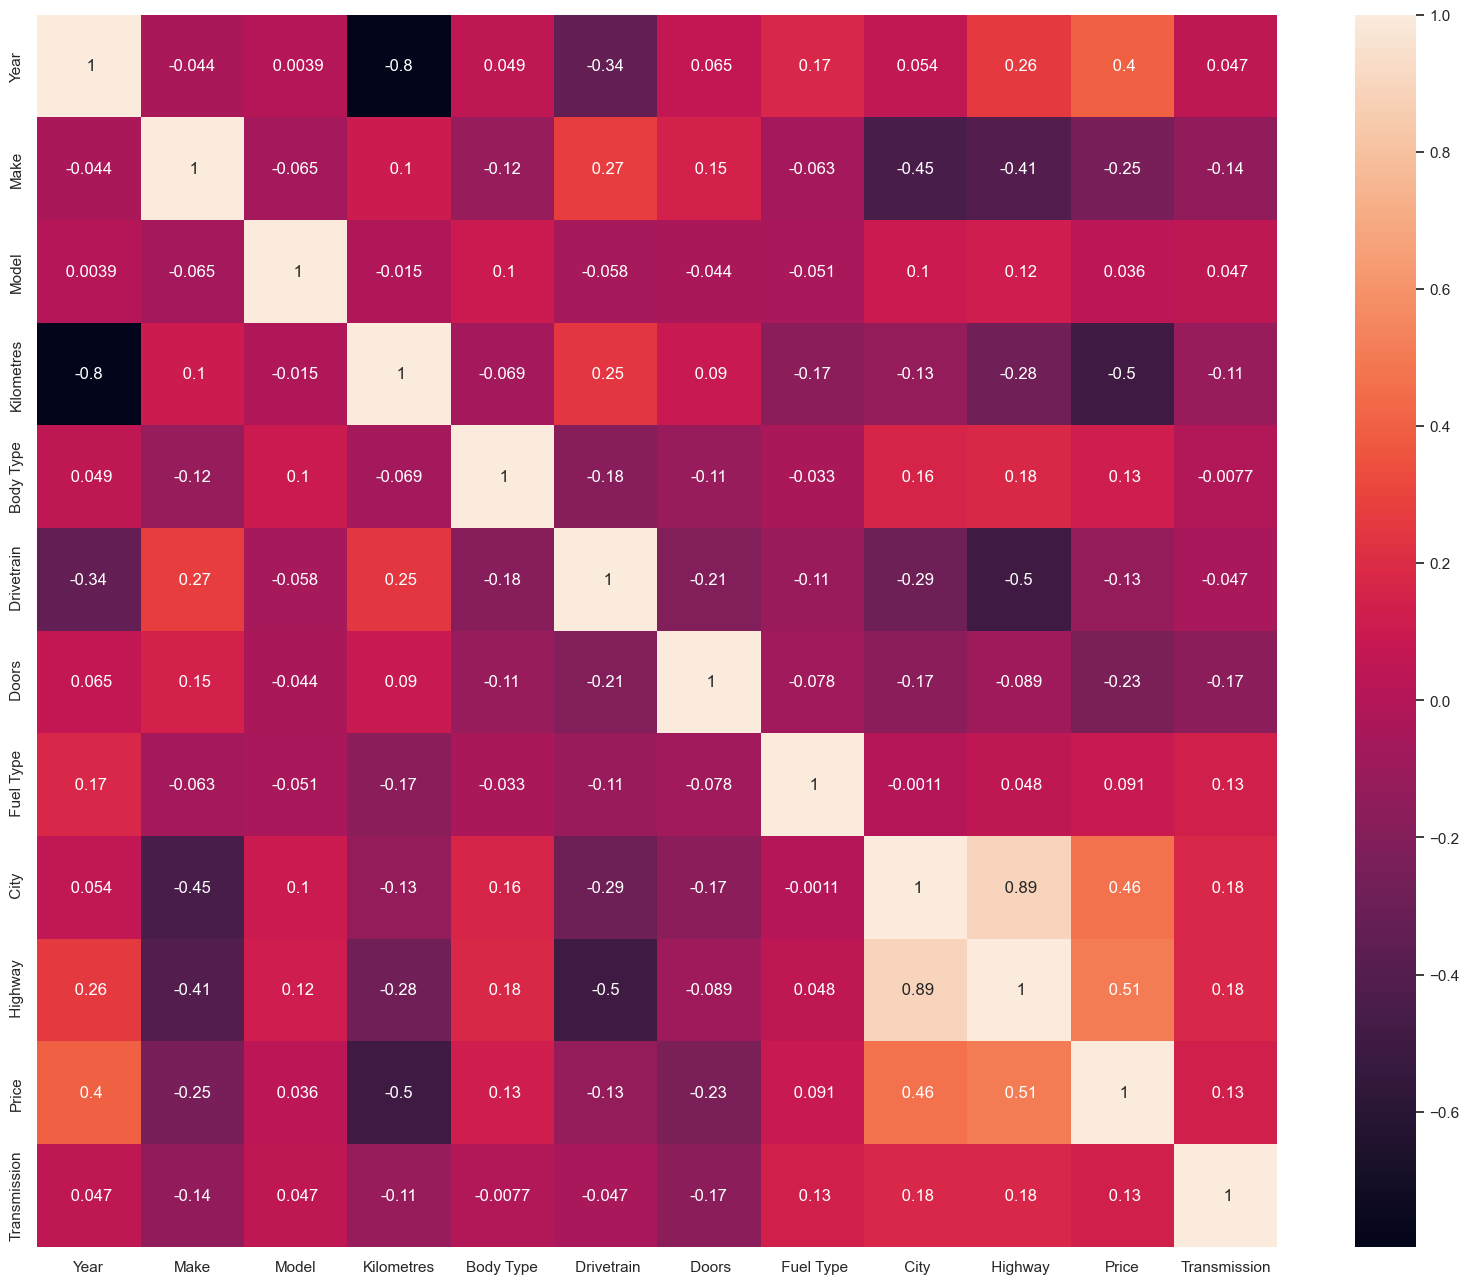

In [46]:
# Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt=' .2g', annot=True)

# Machine Learning Model Building

In [47]:
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

In [48]:
# Test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4], 
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCv object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data 
grid_search.fit(X_train, y_train)

# Print the Best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6}


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=8)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8, random_state=0)

In [51]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 7206.835403267787
MAPE is 0.1811851087386726
MSE is 294353459.95337635
R2 score is 0.7925503217313467
RMSE score is 17156.732204979373


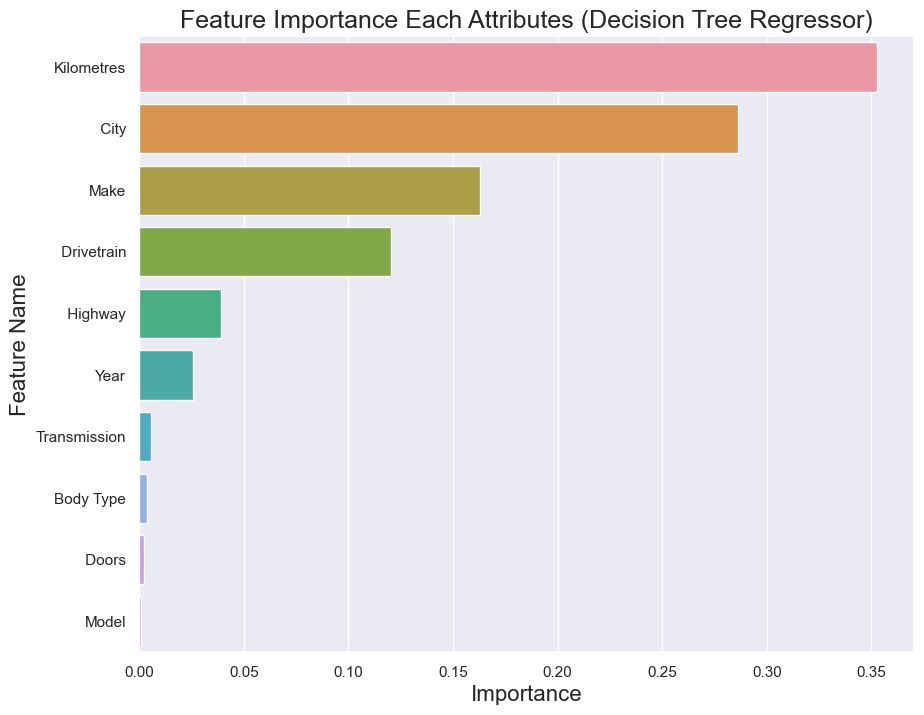

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()